# Solving The Salesman Problem using Genetic Algorithm

* note to the users: 
    1. You may need to install 'ipynb' and 'tqdm' packages to run the following codes
    2. You may need to change the directory of the the .csv files that are being read
    3. All functions used in the code are detailed in a separate ipynb file named 'Funcitions_in_TSP.ipynb'

In [117]:
from ipynb.fs.full.Functions_in_TSP import *

## Import Libraries

In [118]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm

## Read .csv files

In [119]:
#.csv files are stored in a directory called 'data_file'
#the 'data_file' director is assumed to be in the same directory as the 
#'TSP_using_genetic_algorithm.ipynb' file
Atlanta = pd.read_csv('./data_file/Atlanta.csv', index_col = [0])
Boston = pd.read_csv('./data_file/Boston.csv', index_col = [0])
Cincinnati = pd.read_csv('./data_file/Cincinnati.csv', index_col = [0])
Denver = pd.read_csv('./data_file/Denver.csv', index_col = [0])
New_York = pd.read_csv('./data_file/New_York.csv', index_col = [0])
Philadelphia = pd.read_csv('./data_file/Philadelphia.csv', index_col = [0])
San_Francisco = pd.read_csv('./data_file/San_Francisco.csv', index_col = [0])

In [130]:
#Name the city you wish to perform genetic algorithm to solve the TSP problem
#e.g., city = atlanta, city = boston
#You may only choose one of the seven cities above 
city = Boston

#create an adjacency matrix
adj_matrix = make_adj_matrix(city)

# Plot Delivery Locations

In [134]:
city1 = Atlanta
city2 = Boston
city3 = Cincinnati

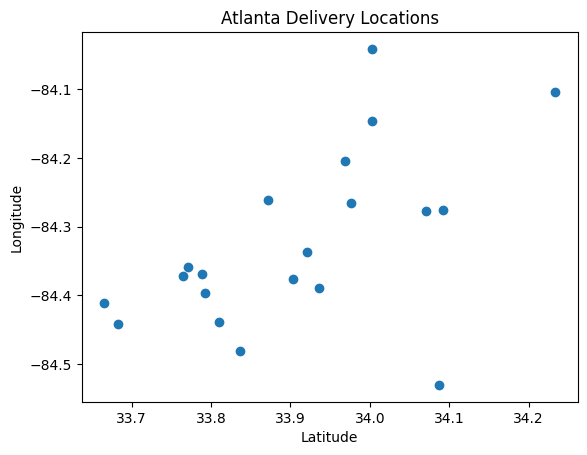

In [99]:
plt.scatter(city1.iloc[:,0], city1.iloc[:,1])
plt.title('Atlanta Delivery Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

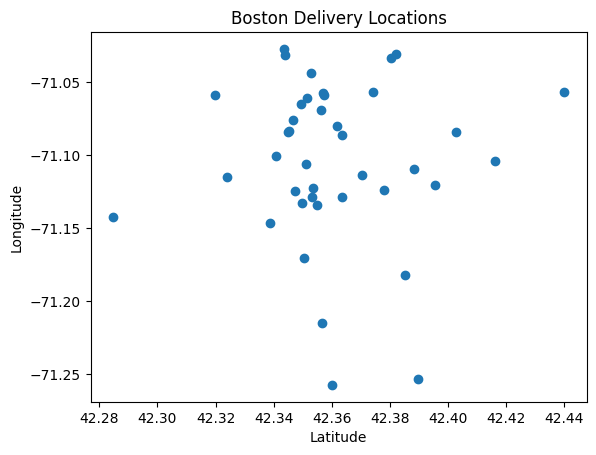

In [100]:
plt.scatter(city2.iloc[:,0], city2.iloc[:,1])
plt.title('Boston Delivery Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

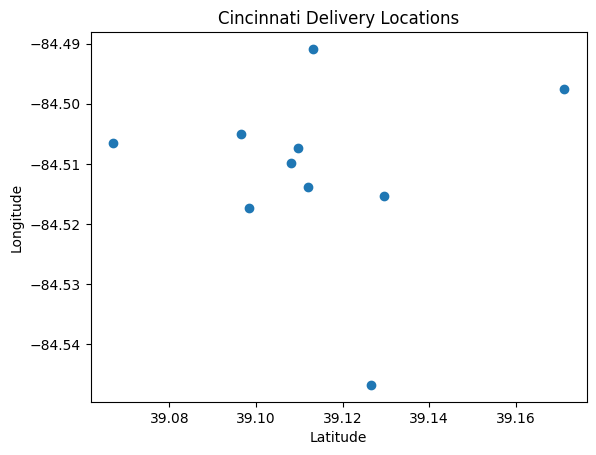

In [101]:
plt.scatter(city3.iloc[:,0], city3.iloc[:,1])
plt.title('Cincinnati Delivery Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## Generate Random Paths

In [86]:
population_size = 100
num_of_cities = len(city)
random.seed(1234)

random_paths = generate_random_population(population_size, num_of_cities)

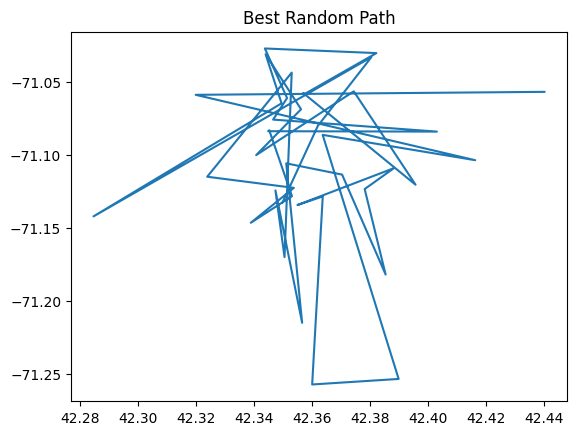

In [87]:
#sort population by their respective fitness score
#first population has the highest fitness score
sorted_population = sorted(random_paths, key = lambda x: fitness_score(x, adj_matrix), reverse = True)

plot_travel(sorted_population[0], city, 'Best Random Path')

In [88]:
adj_matrix.shape

(40, 40)

## Find Optimal Path using Genetic Algorithm

In [89]:
perc_completed = 0
conv_hist = []
max_iter = 10000
for i in tqdm(range(max_iter)):
    pass
    conv_hist.append(fitness_score(sorted_population[0], adj_matrix))
    sorted_population = genetic_algorithm(sorted_population, adj_matrix)
print("100% Completed")

  0%|          | 0/10000 [00:00<?, ?it/s]

100% Completed


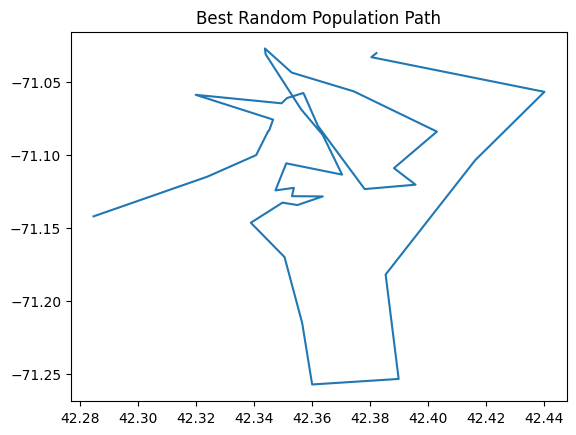

108601.028

In [90]:
plot_travel(sorted_population[0], city, "Best Random Population Path")
round(fitness_score(sorted_population[0], adj_matrix),4)

## Plot Convergence History

Text(0.5, 1.0, 'Convergence History of Fitness Score')

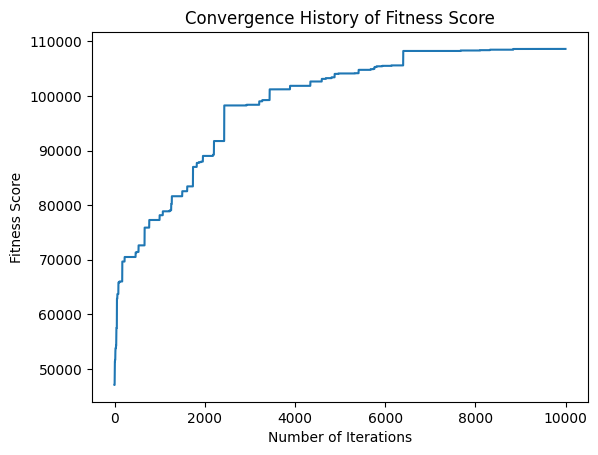

In [91]:
plt.plot(conv_hist)
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness Score')
plt.title('Convergence History of Fitness Score')

## Find Greedy Path

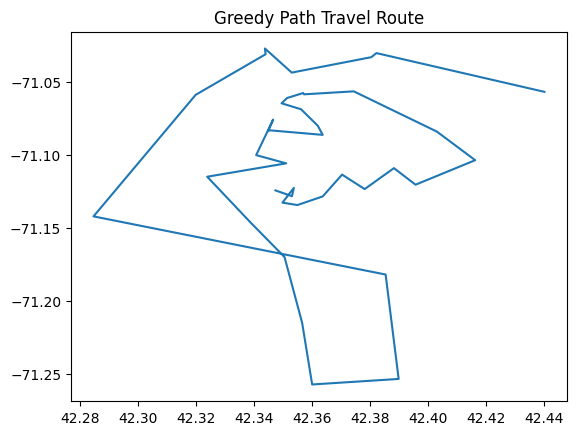

In [131]:
#find the greedy path
#the greedy path starts from city 0 and finds the next nearest city and so on so forth
greedy_path = find_greedy_path(adj_matrix)

#Plot the travel path for greedy path
plot_travel(greedy_path, city, 'Greedy Path Travel Route')

## Generate Initial Population Using Greedy Path

In [122]:
# Generate Initial Population using Greedy Path
population_size = 100
mutation_rate = 0.3
greedy_population = []
for i in range(population_size):
    greedy_population.append(mutate_path(greedy_path, mutation_rate))

## Find Optimal Path using Genetic Algorithm

In [123]:
perc_completed = 0
greedy_conv_hist = []
max_iter = 10000
for i in tqdm(range(max_iter)):
    pass
    greedy_conv_hist.append(fitness_score(greedy_population[0], adj_matrix))
    greedy_population = genetic_algorithm(greedy_population, adj_matrix)
print("100% Completed")

  0%|          | 0/10000 [00:00<?, ?it/s]

100% Completed


In [124]:
print(greedy_population[0])

[9, 2, 0, 1, 8, 4, 6, 5, 7, 3]


## Plot Best Greedy Population Path

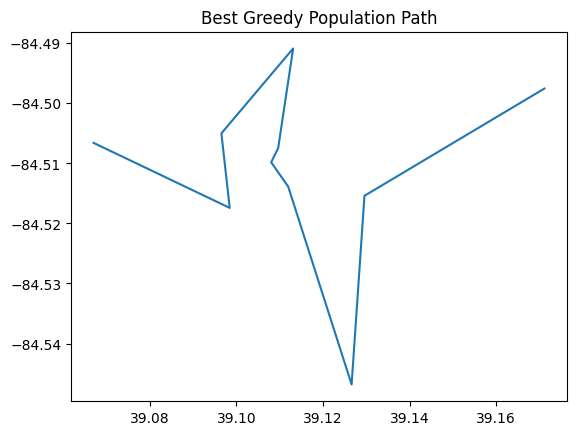

496994.5878

In [106]:
plot_travel(greedy_population[0], city, "Best Greedy Population Path")
round(fitness_score(greedy_population[0], adj_matrix),4)

## Plot Convergence History

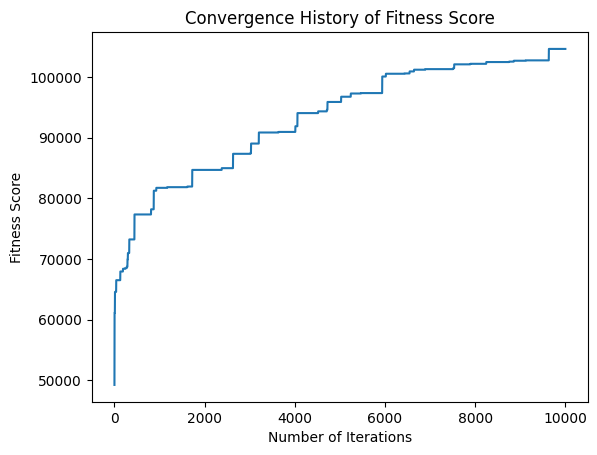

In [16]:
plt.plot(greedy_conv_hist)
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness Score')
plt.title('Convergence History of Fitness Score')
plt.show()

# Main

The main function is a compilation of the functions aboves. 
The arguments of the function is summarized below:

* city_name: string name of city
* poulation_size: integer value of popoulation size
* mutation_rate: rate of mutation at each gene loci. 0.1 is recommended
* init_pop_gen_method: initial populatin generation method. Either 'random' or 'greedy'. 
* max_iter: maximum number of iteration; integer value must be inputted

In [135]:
def main(city_name, population_size, mutation_rate, init_pop_gen_method, max_iter):
    city = pd.read_csv('./data_file/{}.csv'.format(city_name), index_col = [0])
    
    #create an adjacency matrix
    adj_matrix = make_adj_matrix(city)
    
    #generate initial population randomly
    if init_pop_gen_method == 'random':
        population_size = population_size
        num_of_cities = len(city)

        population = generate_random_population(population_size, num_of_cities)
    
    #generate initial population by randomly swapping two indexes of the greedy path
    elif init_pop_gen_method == 'greedy':
        greedy_path = find_greedy_path(adj_matrix)
        
        init_pop_mutation_rate = 0.1 #mutation rate for initial population generation
        population = []
        
        population.append(greedy_path)
        
        for i in range(population_size-1):
            population.append(mutate_path(greedy_path, init_pop_mutation_rate))
    
    #Plot Best Initial Population Path
    population = sorted(population, key = lambda x: fitness_score(x, adj_matrix), reverse = True)
    plot_travel(population[0], city, 'Best Initial Path')
    
    #Find Optimal Path Using Genetic Algorithm
    conv_hist = []
    max_iter = max_iter
    for i in tqdm(range(max_iter)):
        pass
        conv_hist.append(fitness_score(population[0], adj_matrix))
        population = genetic_algorithm(population, adj_matrix)
    
    #Plot Optimal Path
    plot_travel(population[0], city, "Optimal Path")
    fs = round(fitness_score(population[0], adj_matrix),4)
    print("Fitness Score :", fs)
    
    #Plot Convergence History
    plt.plot(conv_hist)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Score')
    plt.title('Convergence History of Fitness Score')
    plt.show()

# Implementation

## Atlanta

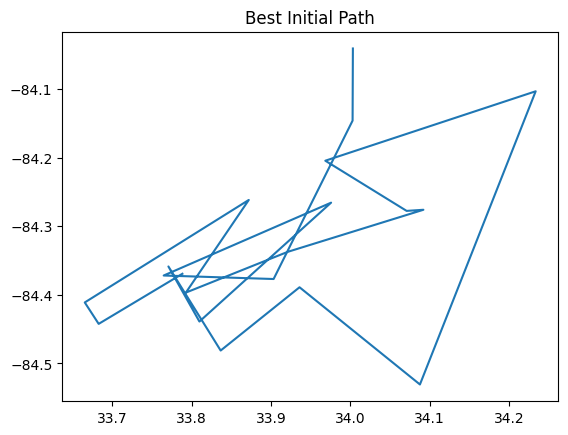

  0%|          | 0/10000 [00:00<?, ?it/s]

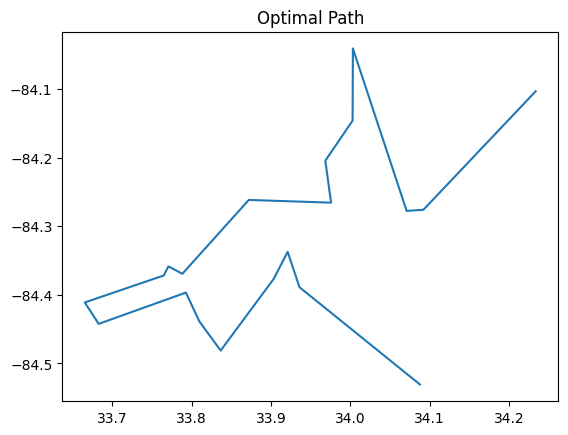

Fitness Score : 56040.877


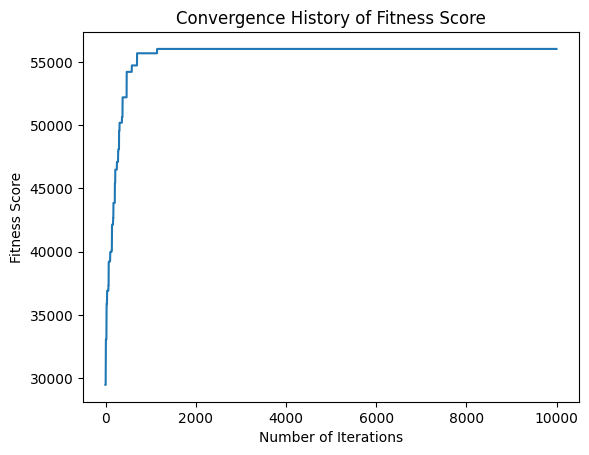

In [112]:
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'random' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main('Atlanta', population_size, mutation_rate, init_pop_gen_method, max_iter)

## Boston

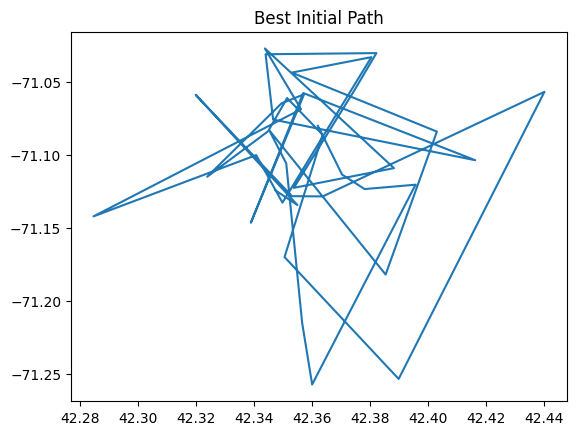

  0%|          | 0/10000 [00:00<?, ?it/s]

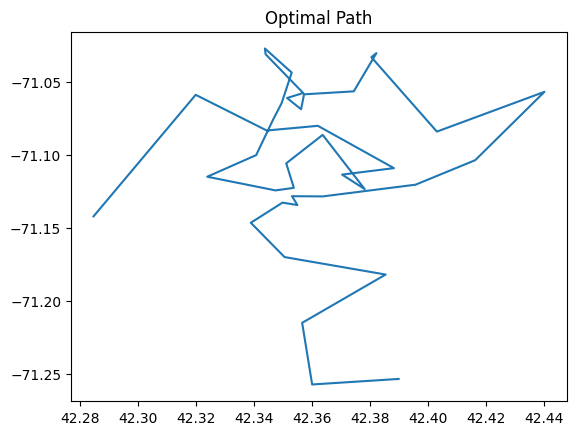

Fitness Score : 109725.5885


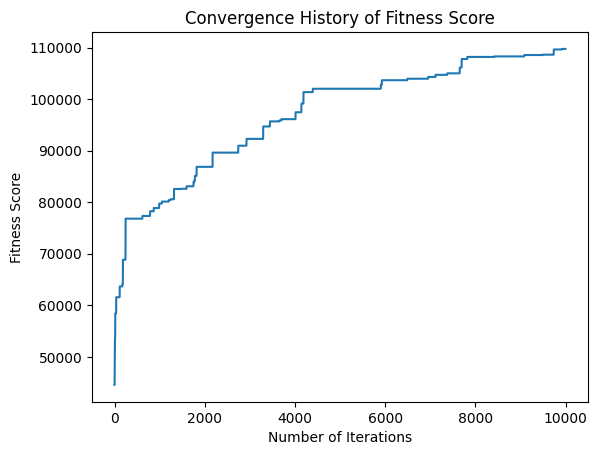

In [19]:
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'random' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main('Boston', population_size, mutation_rate, init_pop_gen_method, max_iter)

## Cincinnati

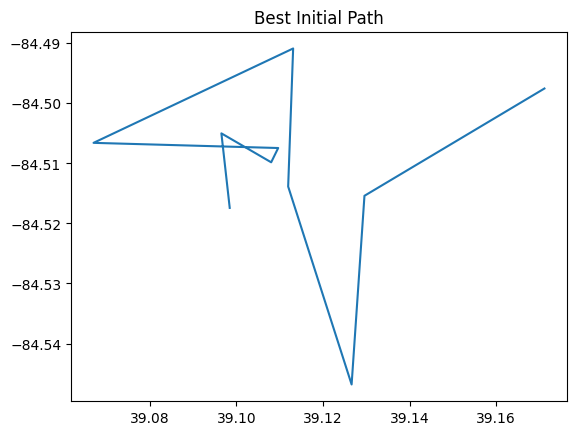

  0%|          | 0/10000 [00:00<?, ?it/s]

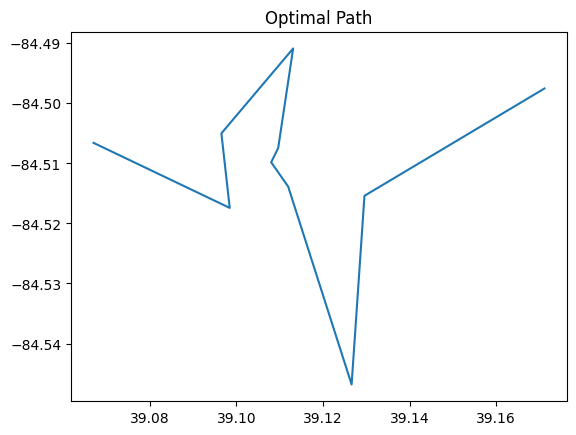

Fitness Score : 496994.5878


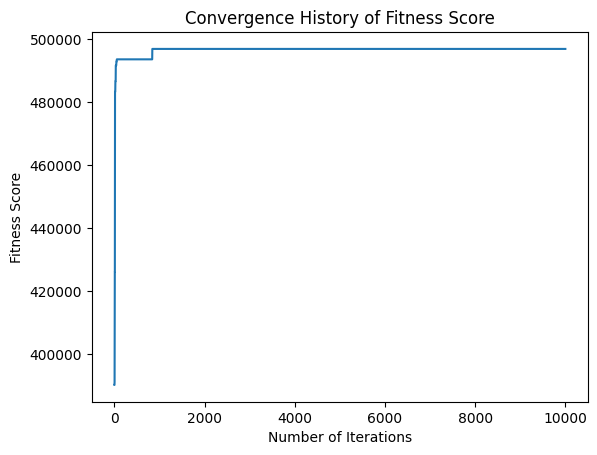

In [20]:
city = 'Cincinnati'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'random' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

## New York

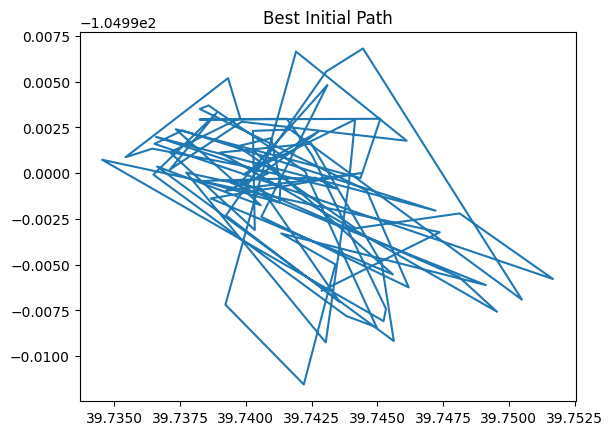

  0%|          | 0/10000 [00:00<?, ?it/s]

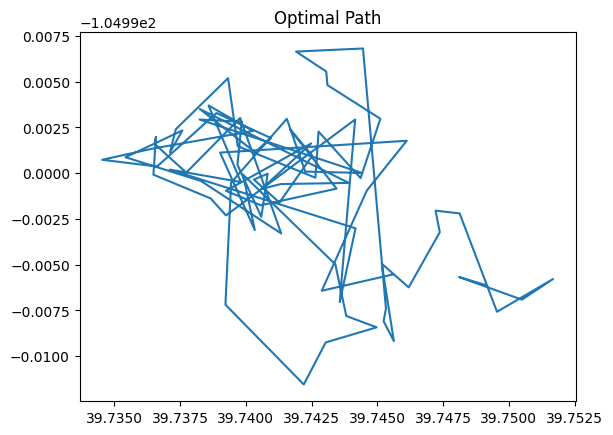

Fitness Score : 391504.7588


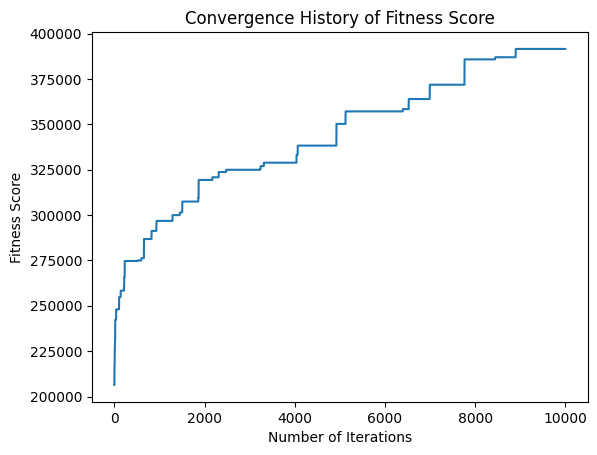

In [22]:
city = 'Denver'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'random' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

## Philadelphia

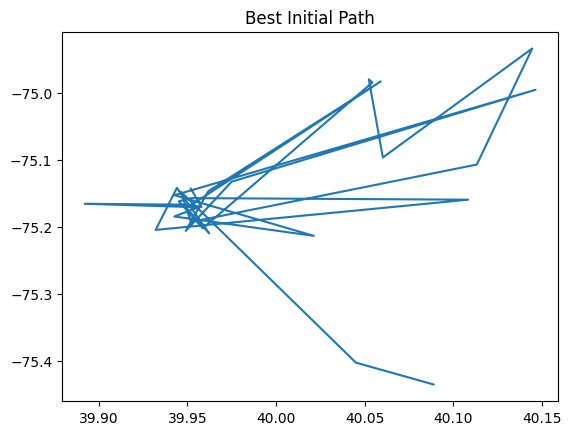

  0%|          | 0/10000 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


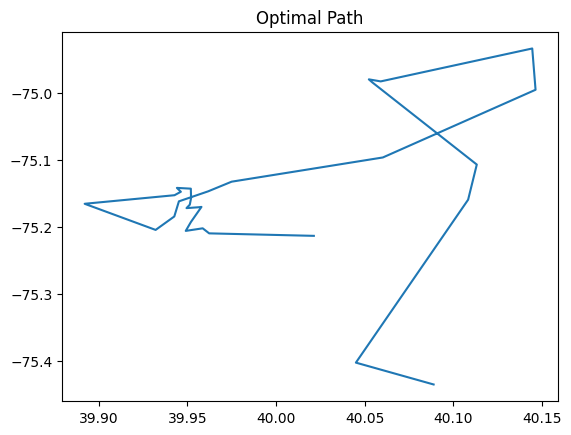

Fitness Score : 82903.0304


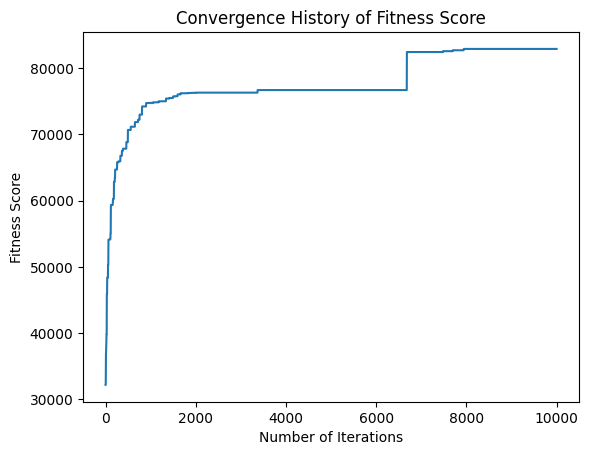

In [23]:
city = 'Philadelphia'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'random' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

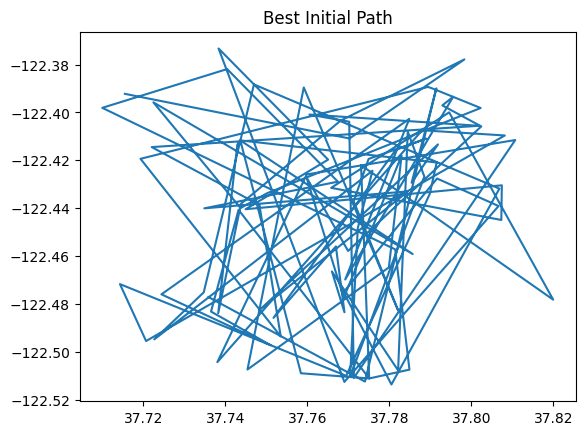

  0%|          | 0/10000 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


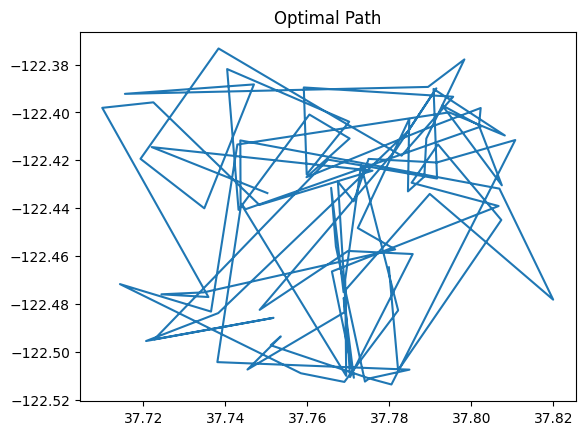

Fitness Score : 29506.425


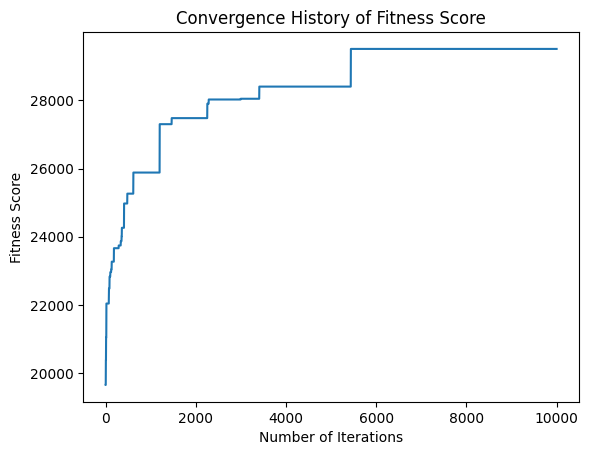

In [24]:
city = 'San_Francisco'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'random' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

# Initial Population Generation Method: Greedy

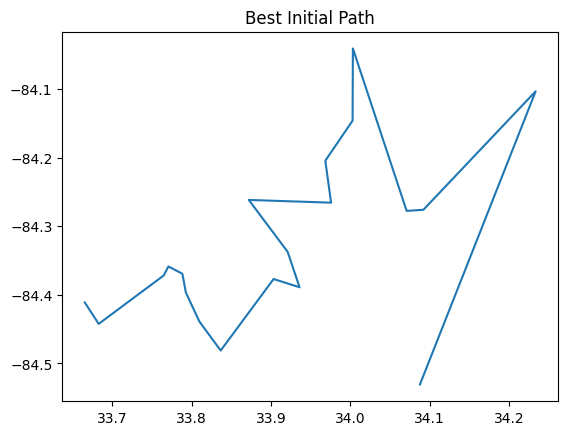

  0%|          | 0/10000 [00:00<?, ?it/s]

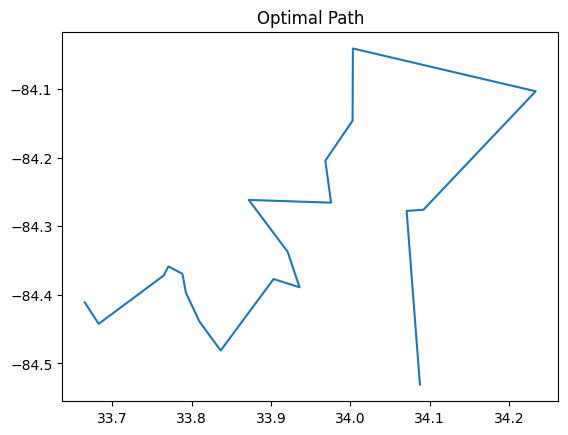

Fitness Score : 59605.745


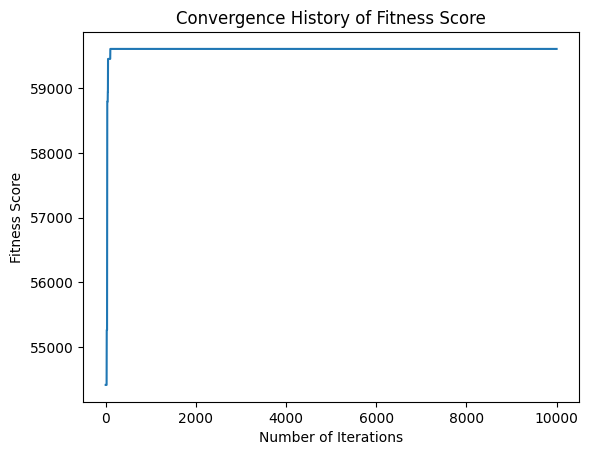

In [113]:
city = 'Atlanta'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

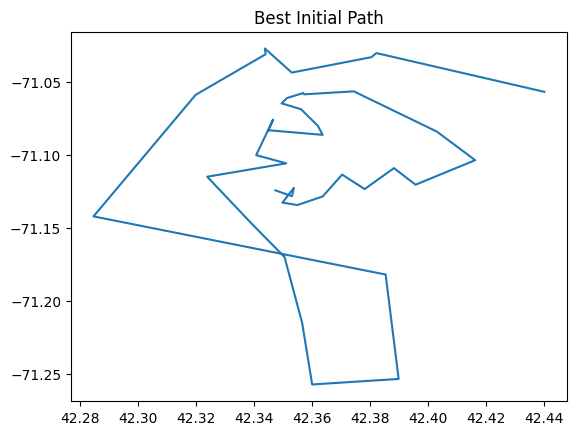

  0%|          | 0/10000 [00:00<?, ?it/s]

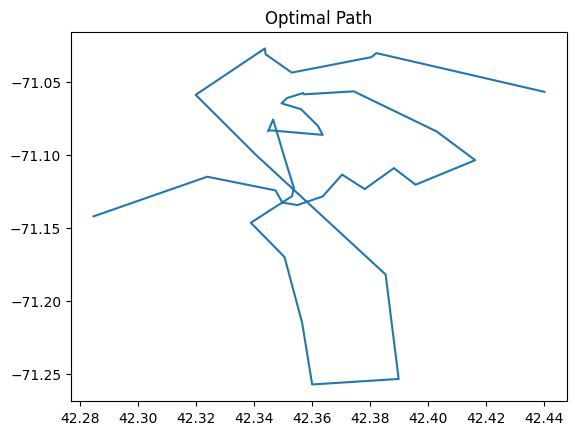

Fitness Score : 115980.678


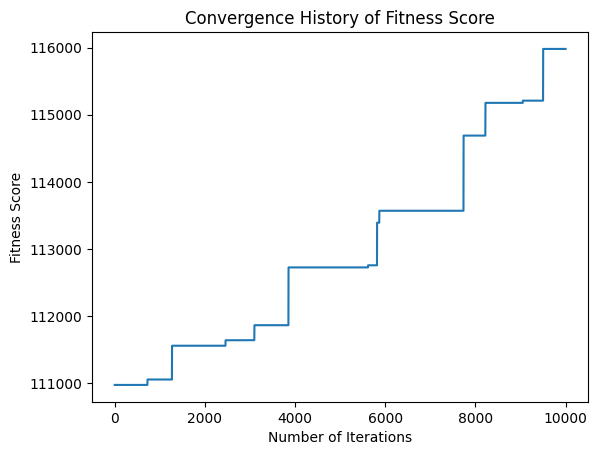

In [114]:
city = 'Boston'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

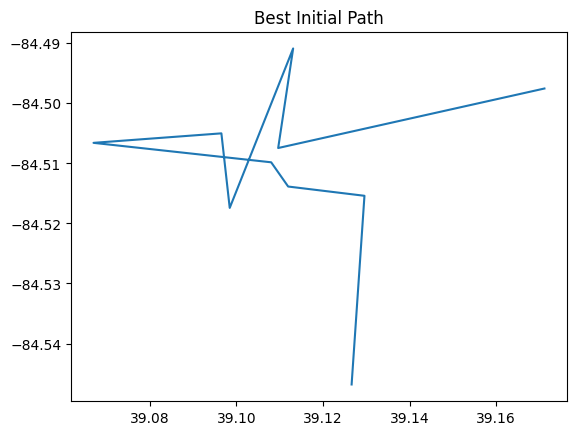

  0%|          | 0/10000 [00:00<?, ?it/s]

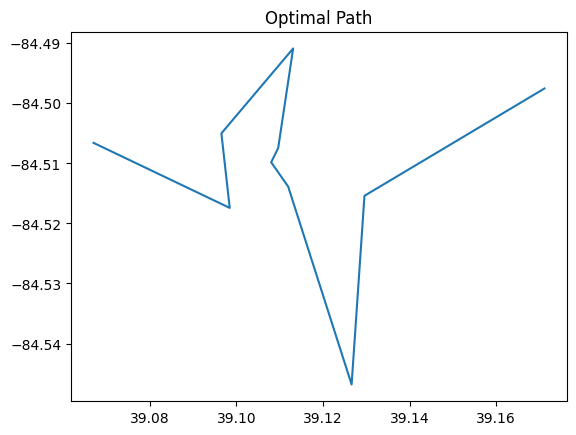

Fitness Score : 496994.5878


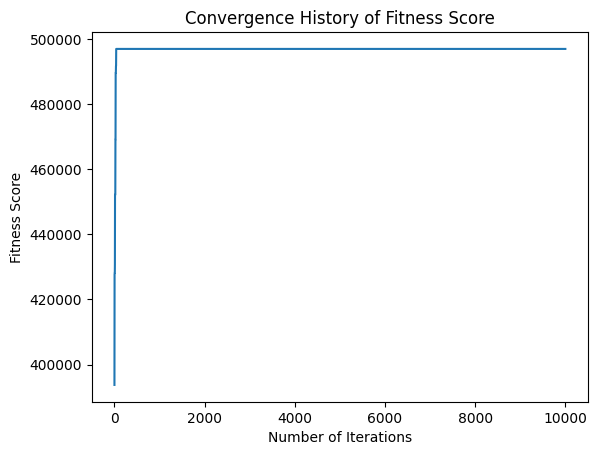

In [115]:
city = 'Cincinnati'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

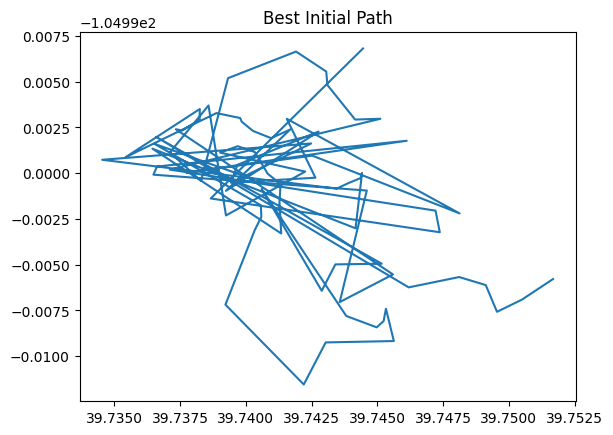

  0%|          | 0/10000 [00:00<?, ?it/s]

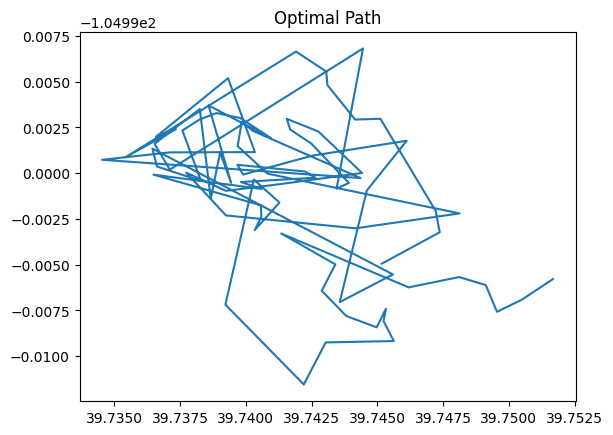

Fitness Score : 429806.0099


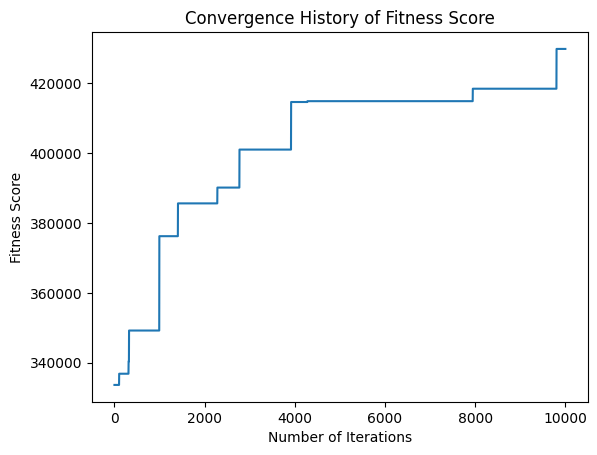

In [28]:
city = 'Denver'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

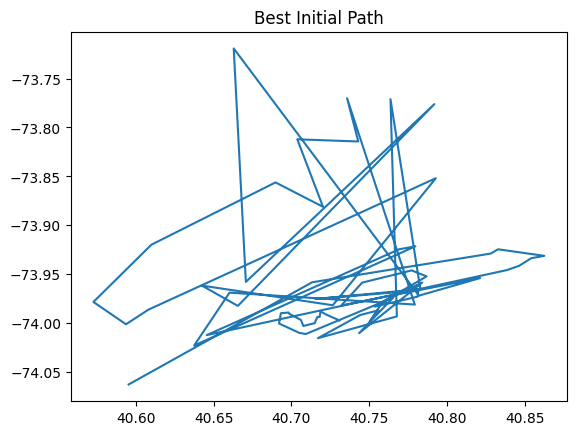

  0%|          | 0/10000 [00:00<?, ?it/s]

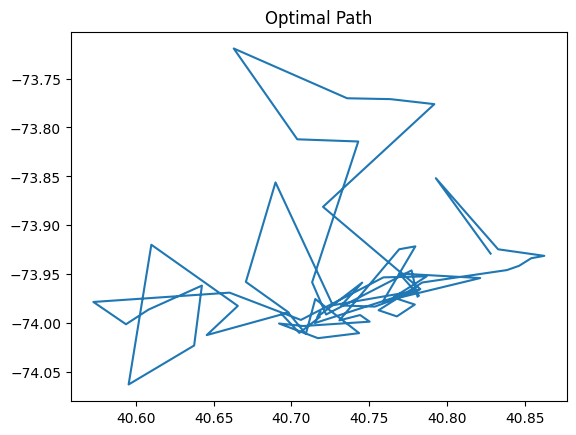

Fitness Score : 33088.9953


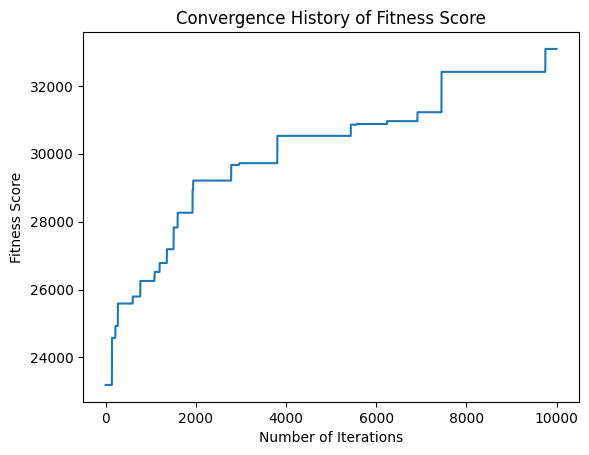

In [29]:
city = 'New_York'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

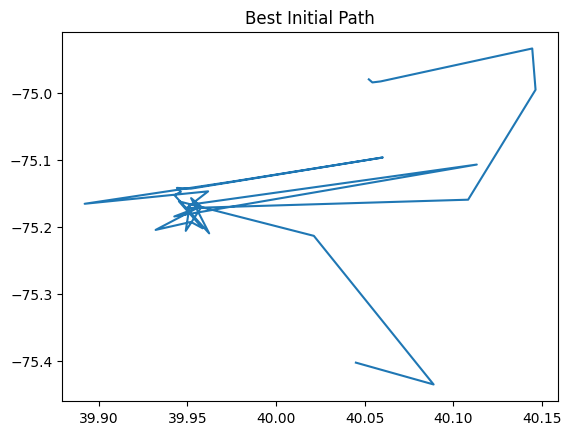

  0%|          | 0/10000 [00:00<?, ?it/s]

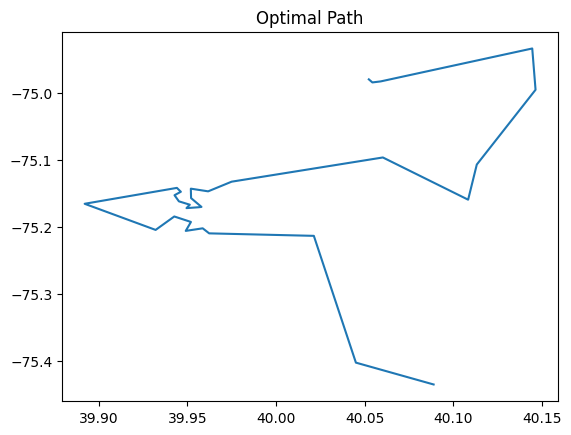

Fitness Score : 95063.5022


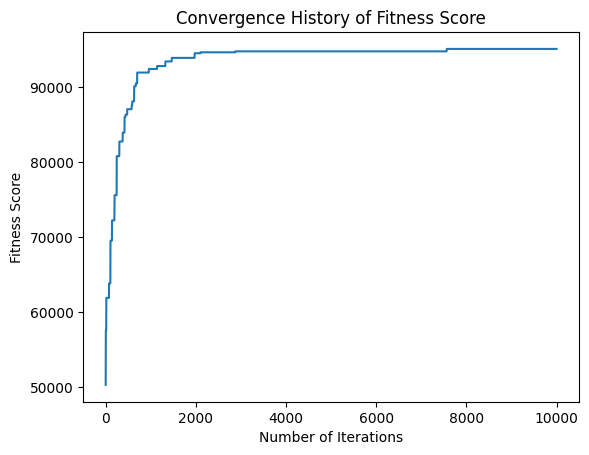

In [30]:
city = 'Philadelphia'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)

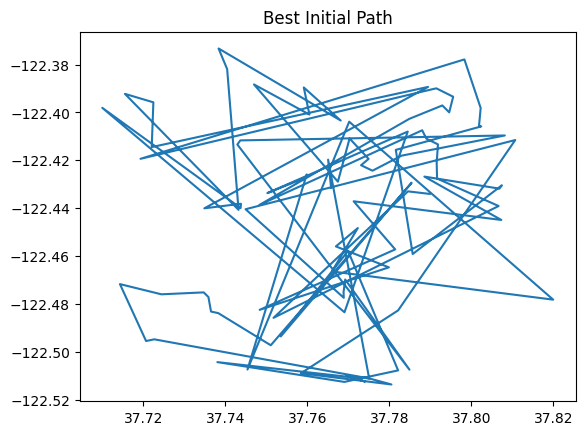

  0%|          | 0/10000 [00:00<?, ?it/s]

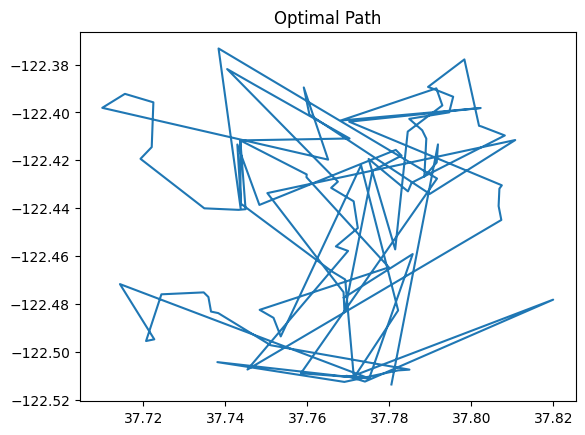

Fitness Score : 41047.8686


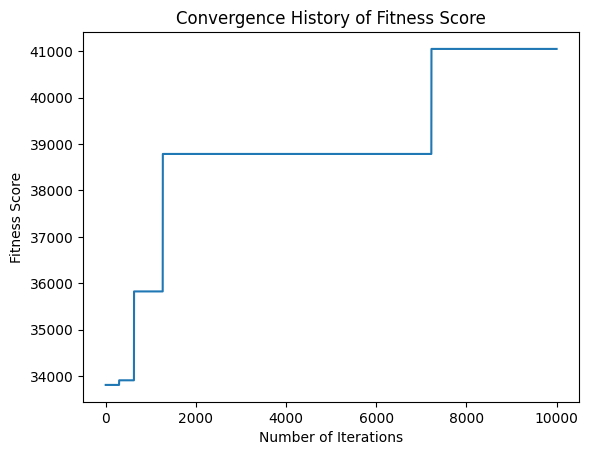

In [31]:
city = 'San_Francisco'
population_size = 100 #population size
mutation_rate = 0.1 #probability of mutation occurence in each gene loci
init_pop_gen_method = 'greedy' #method of initial population generation (e.g.,'random','greedy')
random.seed(2023) #you may change this value to produce different results
max_iter = 10000 #number of maximum iterations
main(city, population_size, mutation_rate, init_pop_gen_method, max_iter)